In [1]:
import csv
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load the three years data
df_1 = pd.read_csv("SPARCS2014.csv", index_col = None, header = 0, low_memory = False)
df_2 = pd.read_csv("SPARCS2015.csv", index_col = None, header = 0, low_memory = False)
df_3 = pd.read_csv("SPARCS2016.csv", index_col = None, header = 0, low_memory = False)

In [3]:
# merge the three years data
data_raw = []
data_raw.append(df_1)
data_raw.append(df_2)
data_raw.append(df_3)

In [4]:
# check how many records and varibaleswe have
def row_col_number(data_raw):
    rows = 0
    columns = 0
    for i in range(len(data_raw)):
        rows = rows + len(data_raw[i].index)
        columns = columns + len(data_raw[i].columns)
    print("The number of rows %d and the number of columns %d" % (rows, columns))

In [5]:
row_col_number(data_raw)

The number of rows 7057910 and the number of columns 112


In [6]:
# select the patient who has Asthma Diagnosis
df_16 = df_3[df_3['CCS Diagnosis Description'] == 'Asthma']
df_15 = df_2[df_2['CCS Diagnosis Description'] == 'Asthma']
df_14 = df_1[df_1['CCS Diagnosis Description'] == 'Asthma']

In [7]:
#merge three years data
df = pd.concat([df_14, df_15,df_16],sort=False)

In [8]:
# check info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85925 entries, 34 to 2343370
Data columns (total 39 columns):
Health Service Area                      85922 non-null object
Hospital County                          85922 non-null object
Operating Certificate Number             85922 non-null float64
Facility ID                              34647 non-null float64
Facility Name                            85925 non-null object
Age Group                                85925 non-null object
Zip Code - 3 digits                      85892 non-null object
Gender                                   85925 non-null object
Race                                     85925 non-null object
Ethnicity                                85925 non-null object
Length of Stay                           85925 non-null object
Type of Admission                        85925 non-null object
Patient Disposition                      85925 non-null object
Discharge Year                           85925 non-null int64
CCS D

In [8]:
#since there are 37 columns most of them are not useful for the project obejective, we will drop them
columns = ['Health Service Area','Hospital County','Operating Certificate Number', 'Facility ID',
        'Facility Name','CCS Diagnosis Code','CCS Procedure Code','CCS Procedure Description',
        'APR DRG Code','APR DRG Description','Payment Typology 2','Payment Typology 3',
        'Attending Provider License Number','Operating Provider License Number','Other Provider License Number',
        'Facility Id','Ratio of Total Costs to Total Charges']
df.drop(columns, inplace=True, axis=1)

In [9]:
# check if drop works
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85925 entries, 34 to 2343370
Data columns (total 22 columns):
Age Group                              85925 non-null object
Zip Code - 3 digits                    85892 non-null object
Gender                                 85925 non-null object
Race                                   85925 non-null object
Ethnicity                              85925 non-null object
Length of Stay                         85925 non-null object
Type of Admission                      85925 non-null object
Patient Disposition                    85925 non-null object
Discharge Year                         85925 non-null int64
CCS Diagnosis Description              85925 non-null object
APR MDC Code                           85925 non-null int64
APR MDC Description                    85925 non-null object
APR Severity of Illness Code           85925 non-null int64
APR Severity of Illness Description    85925 non-null object
APR Risk of Mortality                

In [10]:
# check if there are missing values
df.isnull().sum()

Age Group                               0
Zip Code - 3 digits                    33
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                          0
Type of Admission                       0
Patient Disposition                     0
Discharge Year                          0
CCS Diagnosis Description               0
APR MDC Code                            0
APR MDC Description                     0
APR Severity of Illness Code            0
APR Severity of Illness Description     0
APR Risk of Mortality                   0
APR Medical Surgical Description        0
Payment Typology 1                      0
Birth Weight                            0
Abortion Edit Indicator                 0
Emergency Department Indicator          0
Total Charges                           0
Total Costs                             0
dtype: int64

In [11]:
df.replace(["NaN", 'NaT'], np.nan, inplace = True)
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85892 entries, 34 to 2343370
Data columns (total 22 columns):
Age Group                              85892 non-null object
Zip Code - 3 digits                    85892 non-null object
Gender                                 85892 non-null object
Race                                   85892 non-null object
Ethnicity                              85892 non-null object
Length of Stay                         85892 non-null object
Type of Admission                      85892 non-null object
Patient Disposition                    85892 non-null object
Discharge Year                         85892 non-null int64
CCS Diagnosis Description              85892 non-null object
APR MDC Code                           85892 non-null int64
APR MDC Description                    85892 non-null object
APR Severity of Illness Code           85892 non-null int64
APR Severity of Illness Description    85892 non-null object
APR Risk of Mortality                

In [12]:
# check the colum
df['Birth Weight'].value_counts()

0       85891
3200        1
Name: Birth Weight, dtype: int64

In [13]:
#drop this columns
df.drop('Birth Weight',axis = 1, inplace=True)

In [15]:
# add a new column length to deal with 120+ to 120
new = df['Length of Stay'].str.split(" ", n = 1, expand = True)
df['length']=new[0]
df['length'].value_counts()

1      23767
2      22340
3      14042
4       8768
5       5476
6       3535
7       2367
8       1522
9       1023
10       692
11       496
12       362
13       280
14       226
15       181
16       116
17       109
18        81
20        58
21        57
19        49
22        44
23        32
26        30
24        29
25        23
30        20
28        17
27        17
29        10
       ...  
63         2
46         2
51         2
49         2
71         2
48         2
58         2
50         2
35         2
52         2
60         2
78         1
62         1
119        1
96         1
54         1
55         1
56         1
86         1
70         1
57         1
44         1
114        1
80         1
66         1
59         1
65         1
91         1
61         1
72         1
Name: length, Length: 75, dtype: int64

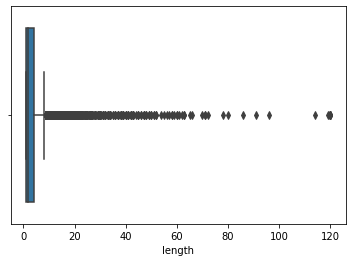

In [19]:
# detect outliers
df['length'] = pd.to_numeric(df['length'])
sns.boxplot(x=df['length'])

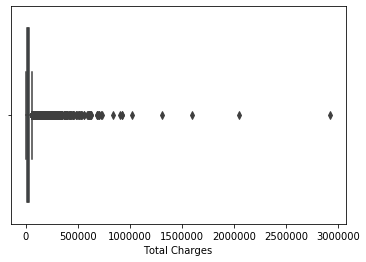

In [21]:
# detect outliers
sns.boxplot(x=df['Total Charges'])

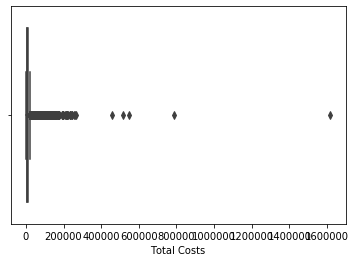

In [22]:
# detect outliers
sns.boxplot(x=df['Total Costs'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85892 entries, 34 to 2343370
Data columns (total 22 columns):
Age Group                              85892 non-null object
Zip Code - 3 digits                    85892 non-null object
Gender                                 85892 non-null object
Race                                   85892 non-null object
Ethnicity                              85892 non-null object
Length of Stay                         85892 non-null object
Type of Admission                      85892 non-null object
Patient Disposition                    85892 non-null object
Discharge Year                         85892 non-null int64
CCS Diagnosis Description              85892 non-null object
APR MDC Code                           85892 non-null int64
APR MDC Description                    85892 non-null object
APR Severity of Illness Code           85892 non-null int64
APR Severity of Illness Description    85892 non-null object
APR Risk of Mortality                

In [26]:
#check the unique value of each column
df['Payment Typology 1'].unique()

array(['Medicare', 'Blue Cross/Blue Shield', 'Medicaid',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay',
       'Federal/State/Local/VA', 'Department of Corrections',
       'Managed Care, Unspecified', 'Unknown'], dtype=object)

In [27]:
#check the number of unique values
df['Payment Typology 1'].nunique()

10

In [28]:
#check the value and corresponding counts
df['Payment Typology 1'].value_counts()

Medicaid                     43690
Medicare                     20697
Private Health Insurance      9871
Blue Cross/Blue Shield        7983
Self-Pay                      2182
Managed Care, Unspecified      577
Federal/State/Local/VA         344
Miscellaneous/Other            253
Unknown                        165
Department of Corrections      130
Name: Payment Typology 1, dtype: int64

In [29]:
# drop the unknown records
df = df[df['Payment Typology 1'] != 'Unknown']
df['Payment Typology 1'].value_counts()

Medicaid                     43690
Medicare                     20697
Private Health Insurance      9871
Blue Cross/Blue Shield        7983
Self-Pay                      2182
Managed Care, Unspecified      577
Federal/State/Local/VA         344
Miscellaneous/Other            253
Department of Corrections      130
Name: Payment Typology 1, dtype: int64

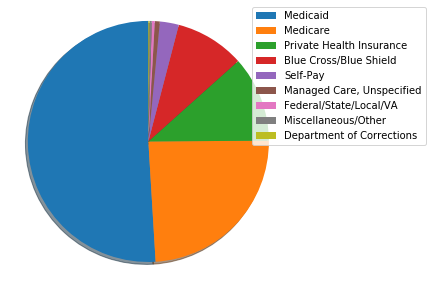

In [30]:
labels = ['Medicaid', 'Medicare', 'Private Health Insurance', 'Blue Cross/Blue Shield','Self-Pay','Managed Care, Unspecified',
         'Federal/State/Local/VA','Miscellaneous/Other','Department of Corrections']
sizes = [43701, 20709, 9879, 7984, 2182,577,344,254,130]
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [31]:
public_count = 0
private_count = 0
self_pay = 0
for i in df['Payment Typology 1']:
    if i == 'Private Health Insurance' or i == 'Blue Cross/Blue Shield':
        private_count += 1
    if i == 'Self-Pay':
        self_pay += 1
    if i == 'Medicaid' or i == 'Medicare' or i =='Federal/State/Local/VA' or i=='Department of Corrections':
        public_count += 1

In [32]:
print('the number of public fund:', public_count,' the number of private fund:',private_count,
      ' the number of uninsured:',self_pay)

the number of public fund: 64861  the number of private fund: 17854  the number of uninsured: 2182


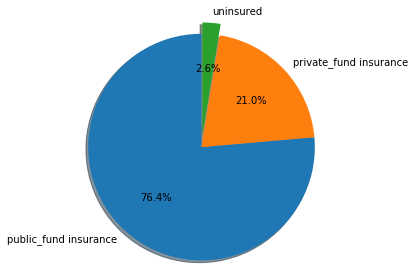

In [22]:
labels = ['public_fund insurance', 'private_fund insurance', 'uninsured']
sizes = [64884, 17863, 2182]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [33]:
#add a new column to label the payment category
df['payment'] = df['Payment Typology 1']
df.loc[df['Payment Typology 1'] == 'Medicaid','payment'] = "public"
df.loc[df['Payment Typology 1'] == 'Medicare', 'payment'] = "public"
df.loc[df['Payment Typology 1'] == 'Federal/State/Local/VA', 'payment'] = "public"
df.loc[df['Payment Typology 1'] == 'Department of Corrections', 'payment'] = "public"
df.loc[df['Payment Typology 1'] == 'Private Health Insurance', 'payment'] = "private"
df.loc[df['Payment Typology 1'] == 'Blue Cross/Blue Shield', 'payment'] = "private"
df.loc[df['Payment Typology 1'] == 'Self-Pay', 'payment'] = "self"
df.head()

,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,length,payment
34,50 to 69,147,F,White,Not Span/Hispanic,2,Urgent,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicare,N,Y,3707.50,3841.52,2,public
50,50 to 69,147,F,White,Not Span/Hispanic,2,Urgent,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Blue Cross/Blue Shield,N,Y,3363.25,3268.61,2,private
64,0 to 17,147,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,Y,1564.90,1658.73,1,public
161,50 to 69,148,M,White,Not Span/Hispanic,4,Elective,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Miscellaneous/Other,N,N,8199.25,4013.71,4,Miscellaneous/Other
235,50 to 69,148,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2014,Asthma,...,Moderate,Major,Medical,Medicare,N,Y,8927.25,87433.72,1,public


In [34]:
# make the data balance according to payment method
# randomly select 2182/3 public fund insurance patient from 2014
df_2014_public_sample = df[(df['Discharge Year'] == 2014) & (df['payment'] == 'public')].sample(n = int(self_pay/3))
# randomly select 2182/3 public fund insurance patient from 2015
df_2015_public_sample = df[(df['Discharge Year'] == 2015) & (df['payment'] == 'public')].sample(n = int(self_pay/3))
# randomly select 2182/3 public fund insurance patient from 2016
df_2016_public_sample = df[(df['Discharge Year'] == 2016) & (df['payment'] == 'public')].sample(n = int(self_pay/3))
# randomly select 2182/3 private fund insurance patient from 2014
df_2014_private_sample = df[(df['Discharge Year'] == 2014) & (df['payment'] == 'private')].sample(n = int(self_pay/3))
# randomly select 2182/3 private fund insurance patient from 2015
df_2015_private_sample = df[(df['Discharge Year'] == 2015) & (df['payment'] == 'private')].sample(n = int(self_pay/3))
# randomly select 2182/3 private fund insurance patient from 2016
df_2016_private_sample = df[(df['Discharge Year'] == 2016) & (df['payment'] == 'private')].sample(n = int(self_pay/3))
# select self pay
df_self_pay = df[df['payment'] == 'self']
# merge the above data to a new dataframe
df_sample = pd.concat([df_2014_public_sample, df_2015_public_sample,df_2016_public_sample, df_2014_private_sample, df_2015_private_sample, df_2016_private_sample, df_self_pay],sort=False)
df_sample.shape

(6544, 23)

In [35]:
public_count = 0
private_count = 0
self_pay = 0
for i in df_sample['payment']:
    if i == 'private' :
        private_count += 1
    if i == 'self':
        self_pay += 1
    if i == 'public':
        public_count += 1
print('the number of public fund:', public_count,' the number of private fund:',private_count,
      ' the number of uninsured:',self_pay)

the number of public fund: 2181  the number of private fund: 2181  the number of uninsured: 2182


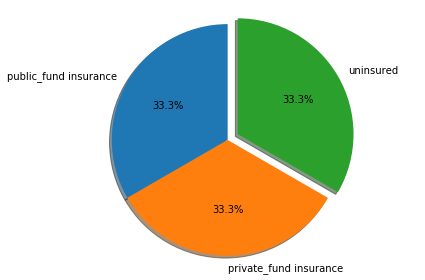

In [26]:
labels = ['public_fund insurance', 'private_fund insurance', 'uninsured']
sizes = [2182, 2182, 2182]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

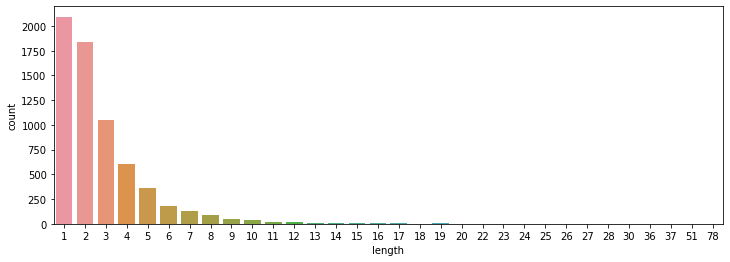

In [37]:
df_sample['length'] = pd.to_numeric(df_sample['length'])
plt.figure(figsize=(12,4))
sns.countplot(df_sample['length'])

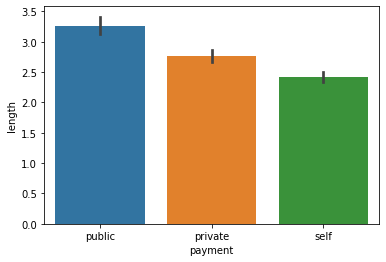

In [38]:
sns.barplot(x='payment',y='length',data=df_sample)

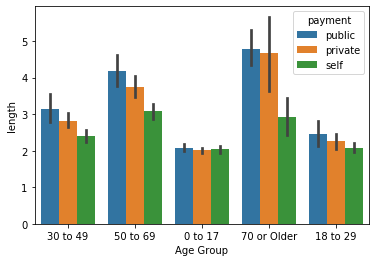

In [30]:
sns.barplot(x='Age Group',y='length',hue = 'payment',data=df_sample)

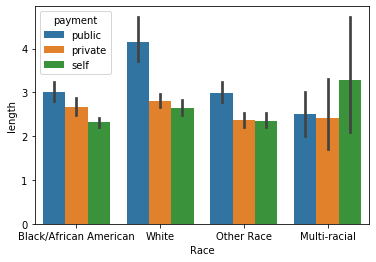

In [31]:
sns.barplot(x='Race',y='length',hue = 'payment',data=df_sample)

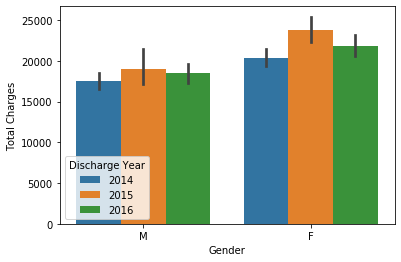

In [32]:
sns.barplot(x='Gender',y='Total Charges',hue = 'Discharge Year',data=df_sample)

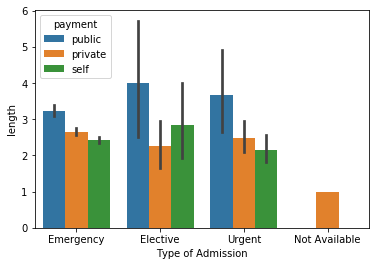

In [33]:
sns.barplot(x='Type of Admission',y='length',hue = 'payment',data=df_sample)

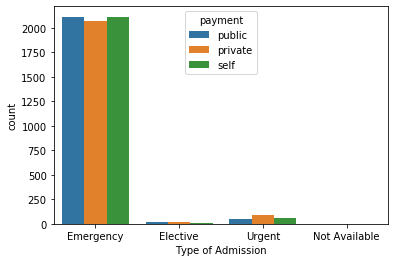

In [44]:
sns.countplot(x='Type of Admission',hue = 'payment',data=df_sample)

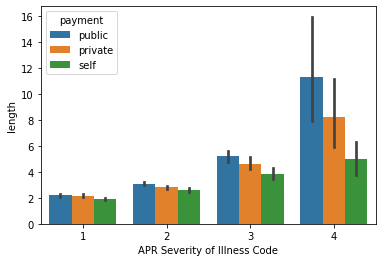

In [39]:
sns.barplot(x='APR Severity of Illness Code',y='length',hue = 'payment',data=df_sample)

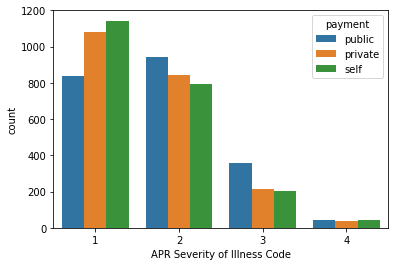

In [40]:
sns.countplot(x='APR Severity of Illness Code',hue = 'payment',data=df_sample)

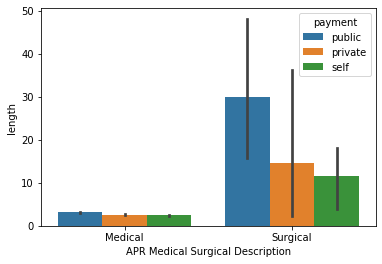

In [41]:
sns.barplot(x='APR Medical Surgical Description',y='length',hue = 'payment',data=df_sample)

In [34]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6544 entries, 1011681 to 2341173
Data columns (total 23 columns):
Age Group                              6544 non-null object
Zip Code - 3 digits                    6544 non-null object
Gender                                 6544 non-null object
Race                                   6544 non-null object
Ethnicity                              6544 non-null object
Length of Stay                         6544 non-null object
Type of Admission                      6544 non-null object
Patient Disposition                    6544 non-null object
Discharge Year                         6544 non-null int64
CCS Diagnosis Description              6544 non-null object
APR MDC Code                           6544 non-null int64
APR MDC Description                    6544 non-null object
APR Severity of Illness Code           6544 non-null int64
APR Severity of Illness Description    6544 non-null object
APR Risk of Mortality                  6544 non

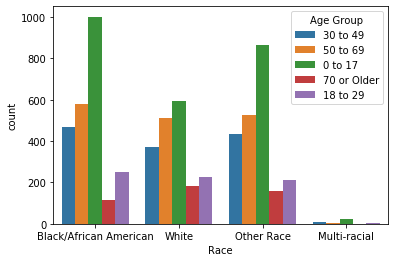

In [46]:
sns.countplot(x='Race',data=df_sample,hue = 'Age Group')

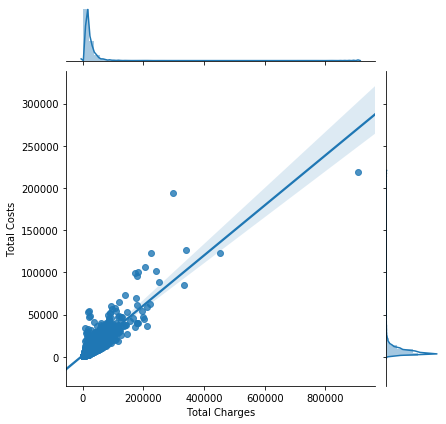

In [47]:
sns.jointplot(x='Total Charges',y='Total Costs',data=df_sample,kind='reg')

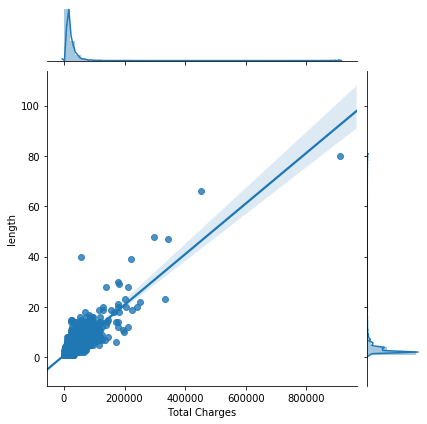

In [48]:
sns.jointplot(x='Total Charges',y='length',data=df_sample,kind='reg')

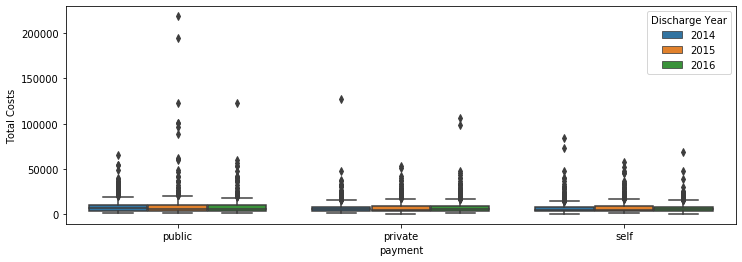

In [54]:
plt.figure(figsize=(12,4))
sns.boxplot(x="payment", y="Total Costs", data=df_sample,hue = "Discharge Year")

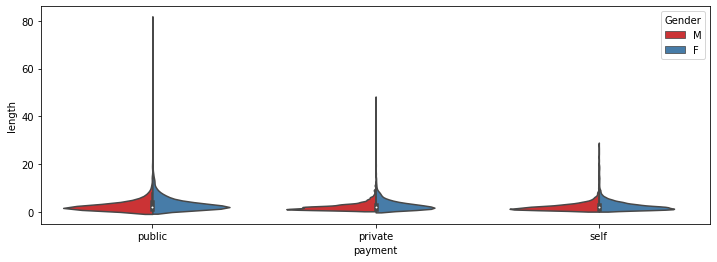

In [50]:
plt.figure(figsize=(12,4))
sns.violinplot(x="payment", y="length", data=df_sample,hue = "Gender",split=True,palette='Set1')

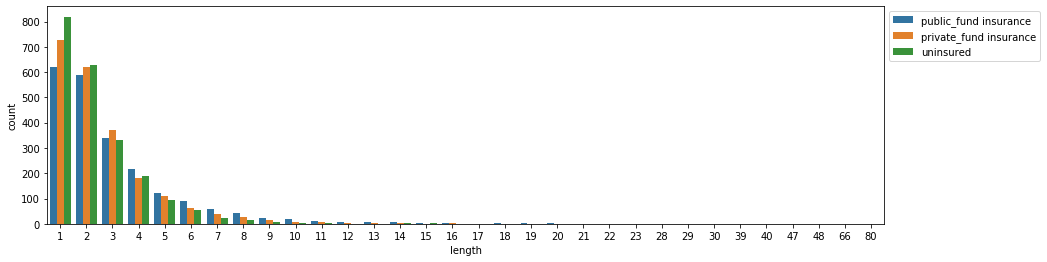

In [55]:
plt.figure(figsize=(15,4))
sns.countplot(x='length',hue = 'payment',data=df_sample)
plt.legend(labels, bbox_to_anchor=(1,1), loc="upper left")

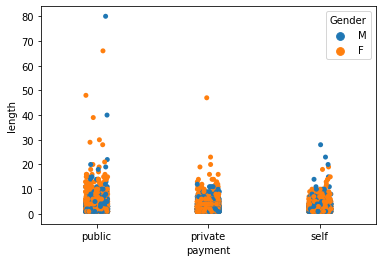

In [56]:
sns.stripplot(x="payment", y="length", hue='Gender',data=df_sample)

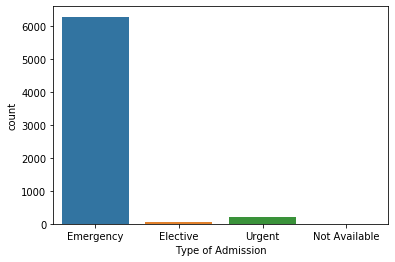

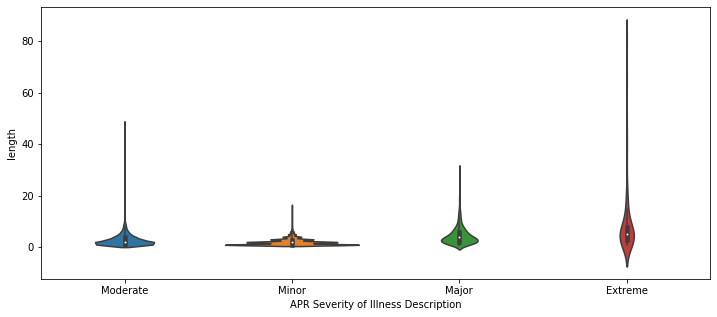

In [58]:
plt.figure(figsize=(12,5))
sns.violinplot(x="APR Severity of Illness Description", y="length", data=df_sample)

In [59]:
columns = ['Zip Code - 3 digits', 'APR MDC Description','APR MDC Code']
df_pair = df_sample.drop(columns,axis=1)

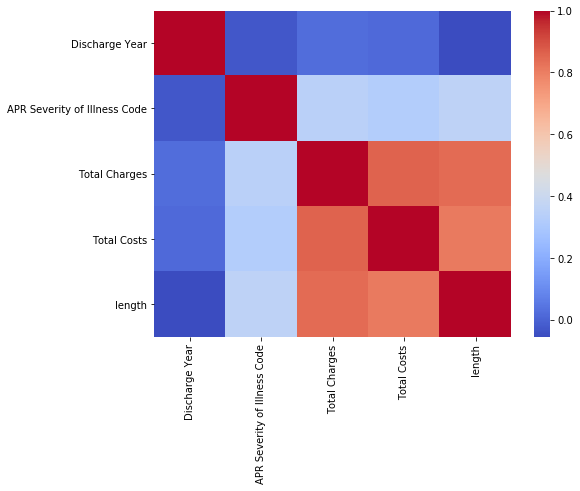

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pair.corr(),cmap='coolwarm')

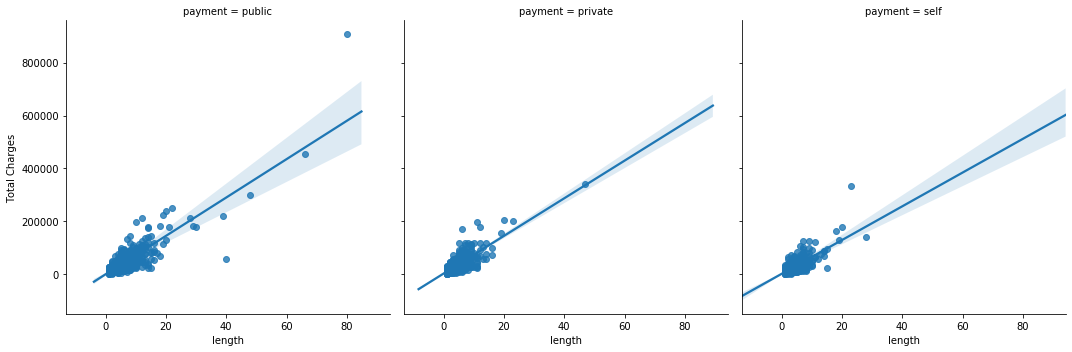

In [61]:
sns.lmplot(x='length',y='Total Charges',data=df_sample,col='payment')

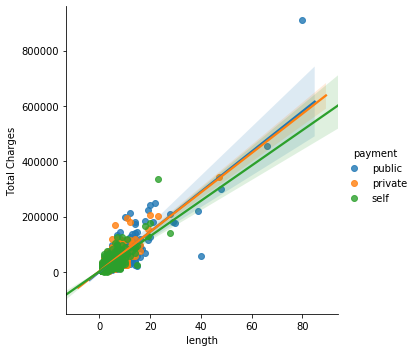

In [63]:
sns.lmplot(x='length',y='Total Charges',data=df_sample,hue='payment')

In [64]:
df_reg = df_sample[df_sample['APR Risk of Mortality'] == 'Minor']
df_reg = df_reg[df_reg['Type of Admission'] == 'Emergency']
df_reg = df_reg[df_reg['Age Group'] == '0 to 17']
df_reg.head()

,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,payment,length
1043792,0 to 17,104,F,Other Race,Unknown,2,Emergency,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,Y,6059.61,5397.40,public,2
1170196,0 to 17,112,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,Y,6565.53,3645.05,public,1
2326384,0 to 17,117,M,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,Y,11725.00,2592.76,public,1
1825409,0 to 17,114,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,Y,6210.00,2757.92,public,1
1318528,0 to 17,112,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2014,Asthma,...,Minor,Minor,Medical,Medicaid,N,N,3534.40,2305.05,public,1


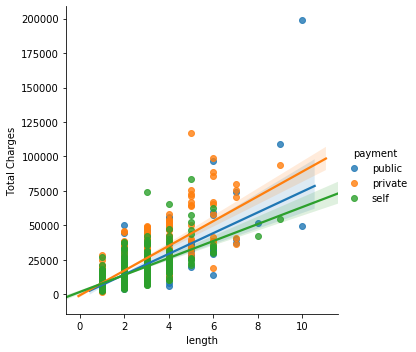

In [65]:
sns.lmplot(x='length',y='Total Charges',data=df_reg,hue = 'payment')

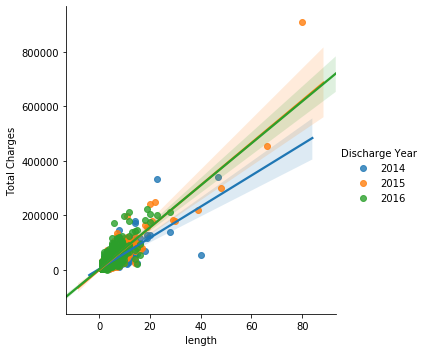

In [66]:
sns.lmplot(x='length',y='Total Charges',data=df_sample,hue='Discharge Year')

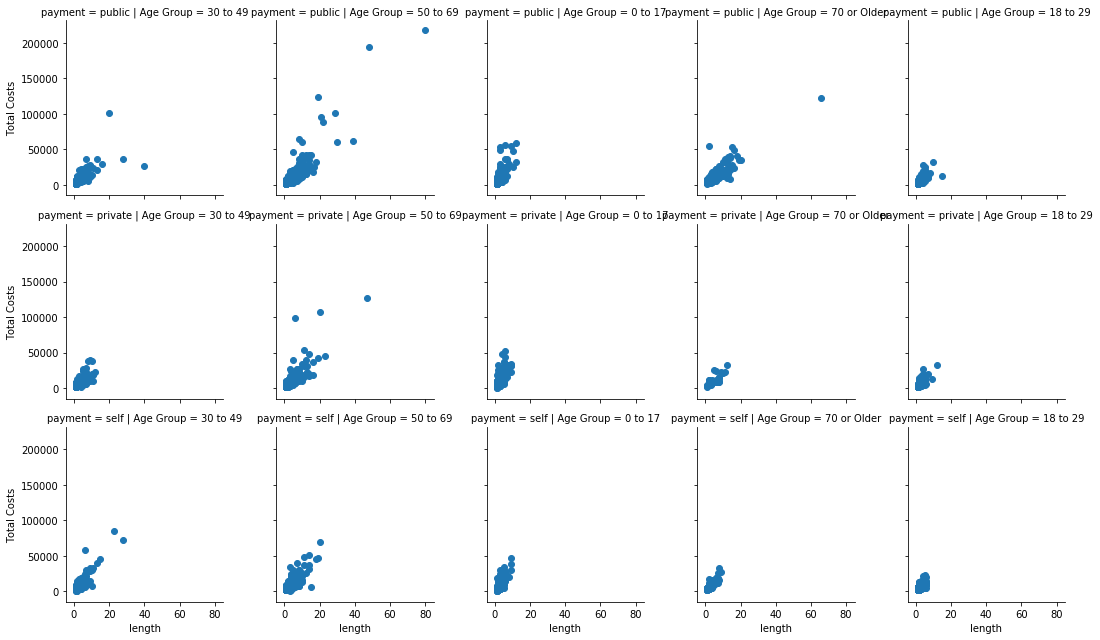

In [77]:
g = sns.FacetGrid(df_sample, col="Age Group",  row="payment")
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter,"length","Total Costs").add_legend()